# **Question 1: Data Pre-processing**

## **1a) Loading the dataset**

In [1]:
# Implement line wrapping
from IPython.display import HTML, display
def set_css():
  display(HTML('''
  <Style>
    pre{
      white-space: pre-wrapped;
    }
  </Style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

In [2]:
# Load dataset
import pandas as pd
DATA_DIR_1 = "/content/CPA.csv"
cpa_df = pd.read_csv(DATA_DIR_1, header = 0)

Using the pandas library and its read_csv() function, the CPA dataset has been loaded, converted to a data frame and stored in **cpa_df**.

## **1b) Importing libraries**

In [3]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

Section 1a) shows the importation of the pandas library for the storage, manipulation and analysis of the dataset.

Section 1b) displays the importation of the numpy, the pyplot package from matplotlib and LabelEncoder libraries to perform scientific calculations and data visualization as charts and label encoding respectively.

# **Question 2: Identifying the number of columns by type.**

In [4]:
from pandas.core.indexes.numeric import is_numeric_dtype
from pandas.core.arrays import categorical
# Finding out the number of numerical, discrete, categorical, continuous and binary columns
numerical = 0
discrete = 0
continuous = 0
categorical = 0
binary = 0
#iterate through each column
for column in cpa_df:
  if(not is_numeric_dtype(cpa_df[column])):
    categorical += 1
  match cpa_df[column].dtype:
    case "int": 
      numerical += 1
      discrete += 1
    case "float": 
      numerical += 1
      continuous += 1
  if (len(cpa_df[column].unique()) == 2):
    binary += 1
print("\nNumber of columns per type:-")
print("Numerical: %d" %numerical)
print("Discrete: %d" %discrete)
print("Continuous: %d" %continuous)
print("Categorical: %d" %categorical)
print("Binary: %d" %binary)


Number of columns per type:-
Numerical: 26
Discrete: 23
Continuous: 3
Categorical: 3
Binary: 7


The number of column of each type can be determined by iterating through each column using a for loop and check the column's datatype or amount of unique values by using if or match statements. The followings describes the condition to be recognised as that specific type and its respective number of columns:

* Numerical (int or float data type): **26**
* Discrete (int data type): **23**
* Continuous (float data type): **3**
* Categorical (object data type): **3**
* Binary (contains exactly 2 unique values): **7**


# **Question 3: Handling Missing Values**

## **Step 1: Find the number of missing values in each column**

In [5]:
# Output the number of missing values per column
print(cpa_df.isna().sum())

ID                      0
Year_Birth              0
Education               0
Marital_Status         22
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases      14
NumWebPurchases        15
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


The number of missing values per column are found using the isna() and sum() functions. As shown in the output above, there are 4 columns with missing values, namely

* Marital_Status: **22** missing values
* Income: **22** missing values
* NumDealsPurchases: **14** missing values
* NumWebPurchases: **15** missing values

## **Step 2: Calculate a value for each column for data imputation.**

In [6]:
# Calculate mode of Marital Status column.
marital_mode = cpa_df.Marital_Status.mode()[0]
print("Marital_Status Mode:", marital_mode)
# Calculate the mean of Income, NumDealsPurchases, NumWebPurchases
mean_columns = ["Income", "NumDealsPurchases", "NumWebPurchases"]
mean_income = mean_dealsP = mean_webP = i = 0
mean_values = [mean_income, mean_dealsP, mean_webP]
for c in mean_columns:
  mean_values[i] = cpa_df[c].mean()
  print("%s mean: %.2f" %(c, mean_values[i]))
  i += 1

Marital_Status Mode: Married
Income mean: 52247.25
NumDealsPurchases mean: 2.32
NumWebPurchases mean: 4.08


In order to resolve the missing values issue, other values can be used to replace said missing values. The mode has been calcuated for the Marital_Status column since it is a categorical column and since any among mean, mode or median can be used for numerical columns, the mean has been calculated for Income, NumDealsPurchases and NumWebPurchases.

## **Step 3: Data Imputation**

In [7]:
# Replace the missing values of Marital_StaTus with its mode
cpa_df["Marital_Status"].fillna(marital_mode, inplace = True)
print("Replacing missing values with %s in Marital_Status column" %marital_mode)
i = 0
# Replace the missing values of Income, NumDealsPurchases and NumWebPurchases 
# with their mean
for c in mean_columns:
  cpa_df[c].fillna(mean_values[i], inplace = True)
  print("Replacing missing values with %.2f in %s column" %(mean_values[i], c))
  i += 1

Replacing missing values with Married in Marital_Status column
Replacing missing values with 52247.25 in Income column
Replacing missing values with 2.32 in NumDealsPurchases column
Replacing missing values with 4.08 in NumWebPurchases column


Using the fillna() method, each column has been imputed with their respective replacement value.

## **Step 4: Verify that all missing values have been handled**

In [8]:
print(cpa_df.isna().sum())

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64


As shown in the output above, there are no missing values in any of the columns, hence all missing values have been handled.

# **Question 4: Is encoding required for this dataset?**

Yes, encoding is required as CPA.csv contains categorical data columns, as shown in section "Question 2". Some machine learning algoritms cannot process categorical or text data properly, hence said data are converted to a processable form i.e. numerical data, using encoding.

For this CPA.csv dataset, we can use label encoding to convert the Education, Marital_Status and Dt_Customer data to numerical data..

In [9]:
# Show categorical data before encoding
print("Pre encoding data:\n")
print(cpa_df.Education.head())
print(cpa_df.Marital_Status.head())
print(cpa_df.Dt_Customer.head())
# Instantiate label encoder
lab = LabelEncoder()
# perform label encoding on Education, Marital_Status and Dt_Customer columns
cpa_df.Education = lab.fit_transform(cpa_df.Education)
cpa_df.Marital_Status = lab.fit_transform(cpa_df.Marital_Status)
cpa_df.Dt_Customer = lab.fit_transform(cpa_df.Dt_Customer)
# show data after label encoding
print("\nPost encoding data:\n")
print(cpa_df.Education.head())
print(cpa_df.Marital_Status.head())
print(cpa_df.Dt_Customer.head())


Pre encoding data:

0    Graduation
1    Graduation
2    Graduation
3    Graduation
4           PhD
Name: Education, dtype: object
0      Single
1      Single
2    Together
3    Together
4     Married
Name: Marital_Status, dtype: object
0    04/09/2012
1    08/03/2014
2    21/08/2013
3    10/02/2014
4    19/01/2014
Name: Dt_Customer, dtype: object

Post encoding data:

0    2
1    2
2    2
3    2
4    4
Name: Education, dtype: int64
0    4
1    4
2    5
3    5
4    3
Name: Marital_Status, dtype: int64
0     80
1    157
2    444
3    199
4    390
Name: Dt_Customer, dtype: int64


As shown in output above, the categorical data from Education, Marital_Status and Dt_Customer columns were converted to numerical values using the fit_transform() method of the LabEncoder() instance, namely "lab".

# **Question 5: Perform EDA and Visualize the Education and Marital_Status columns.**

In [10]:
# Find Interquartile range of Education and Marital_Status column
cur_columns = ["Education", "Marital_Status"]
for c in cur_columns:
    Q1 = cpa_df[c].quantile(0.25)
    Q3 = cpa_df[c].quantile(0.75)
    IQR = Q3 - Q1
    print("%s Inter-quartile range: %.2f" %(c, IQR))
    # Calculate Lower and Upper fences
    lf = Q1 - (1.5 * IQR)
    uf = Q3 + (1.5 * IQR)
    median = cpa_df[c].median()
    print("%s Lower fence: %.2f " %(c, lf))
    print("%s Upper fence: %.2f " %(c, uf))
    print("%s Q1: %.2f " %(c, Q1))
    print("%s Q3: %.2f " %(c, Q3))
    print("%s Median: %.2f " %(c, median))
    print("%s Outliers: " %c)
    print(cpa_df[((cpa_df[c] < lf) | (cpa_df[c] > uf))])
    print()

Education Inter-quartile range: 1.00
Education Lower fence: 0.50 
Education Upper fence: 4.50 
Education Q1: 2.00 
Education Q3: 3.00 
Education Median: 2.00 
Education Outliers: 
         ID  Year_Birth  Education  Marital_Status        Income  Kidhome  \
19     2278        1985          0               4  33812.000000        1   
37    10755        1976          0               3  23718.000000        1   
46     9909        1996          0               3   7500.000000        0   
67     9369        1979          0               4  88194.000000        0   
71    10629        1973          0               3  52247.251354        1   
...     ...         ...        ...             ...           ...      ...   
2193   8722        1957          0               3  82347.000000        0   
2210    607        1955          0               2  41769.000000        0   
2213   3661        1995          0               4  80617.000000        0   
2222  10659        1979          0               5

As shown in the output provided above, the quantiles of both Education and Marital_Status were calculated using the quantile() function and those values were then used to calculate the inter-quartile in range and consequently the lower and upper fences. Using said fences, the outliers of each column can be identified.

The condition of any value in Education and Marital_Status being lower/greater than their lower/upper fences respectively is used to output the outliers of each of those 2 columns. 

As shown above, education contains outliers but on the other hand, an empty data frame was outputted for the Marital_Status column's outlier variable, meaning that there is no outlier.

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa8543477c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa854347d00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa854347640>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa854198280>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa854198520>],
 'means': []}

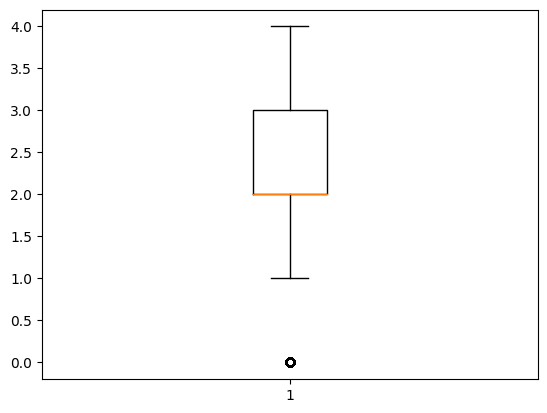

In [11]:
# Visualize Education and Marital_Status columns
plt.boxplot(cpa_df["Education"])

Further proved by the chart above, the whiskers are of equal length, hence the values are symmetrically distributed around the median but since the median is on the bottom edge of the box, this means that the distribution is positively skewed. It also be seen that the distribution contains outliers of the value 0.0 as shown by the dot below the lower whisker.

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff986f3c1f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff986f3c730>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff986f0bf10>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff986f3cc70>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff986f3cf10>],
 'means': []}

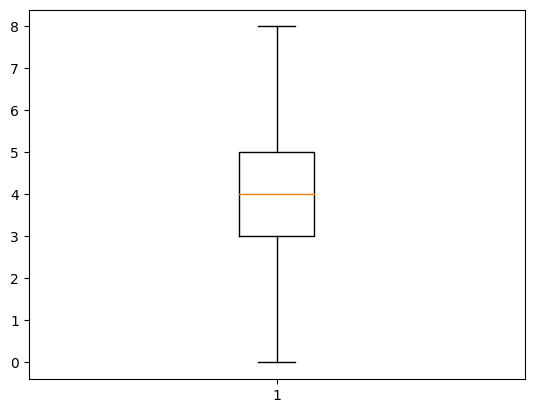

In [24]:
# Visualize Education and Marital_Status columns
plt.boxplot(cpa_df["Marital_Status"])

As shown in the box plot above, the whiskers are of equal length, indicating a symmetrical data distribution around the median in the Marital_Status column and the median is also in the middle of the box, thus proving that the distribution is not skewed. Furthermore, there are no outliers in the Marital_Status column, proved by the absence of dots beyond the whiskers.

# **Question 6**

## **Scaling the dataset.**

In [12]:
# Scaling the dataset using Standard Scaler
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit_transform(cpa_df)
scaled_frame = pd.DataFrame(std_scale, columns = cpa_df.columns)
print("Scaled Dataset:")
print(scaled_frame.head())

Scaled Dataset:
         ID  Year_Birth  Education  Marital_Status    Income   Kidhome  \
0 -0.020999   -0.985345  -0.350141        0.257102  0.235327 -0.825218   
1 -1.053058   -1.235733  -0.350141        0.257102 -0.235826  1.032559   
2 -0.447070   -0.317643  -0.350141        1.190504  0.773633 -0.825218   
3  0.181716    1.268149  -0.350141        1.190504 -1.022732  1.032559   
4 -0.082614    1.017761   1.428354       -0.676300  0.241519  1.032559   

   Teenhome  Dt_Customer   Recency  MntWines  ...  NumWebVisitsMonth  \
0 -0.929894    -1.303763  0.307039  0.983781  ...           0.693904   
1  0.906934    -0.898762 -0.383664 -0.870479  ...          -0.130463   
2 -0.929894     0.610786 -0.798086  0.362723  ...          -0.542647   
3 -0.929894    -0.677853 -0.798086 -0.870479  ...           0.281720   
4 -0.929894     0.326760  1.550305 -0.389085  ...          -0.130463   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0      -0.28014      -0.28383  

The dataset is scaled through the standard scaling method by using the StandardScaler() method and is transformed using the fit_transform() method. It can be observed in the output above that all column values have been scaled to the same range, thus preventing data dominance.

## **Splitting the dataset.**

In [13]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
# Shuffling rows 
df_shuffled = shuffle (cpa_df, random_state=42)
# Setting the dependent variable
DV = "Response"
# Splitting the dataset into a 80/20 training and testing set respectively
x = df_shuffled.drop (DV, axis=1) 
y = df_shuffled [DV] 
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size=0.20, random_state=42)
print("Features:")
print (x_train.head ())
print("Outcome:")
print (y_train.head ())

Features:
         ID  Year_Birth  Education  Marital_Status   Income  Kidhome  \
1723   4686        1962          4               6  82571.0        0   
691     143        1970          2               4  61209.0        0   
79     1618        1965          2               5  56046.0        0   
1735  10092        1954          2               2  70044.0        0   
1045   5985        1965          3               4  33168.0        0   

      Teenhome  Dt_Customer  Recency  MntWines  ...  NumStorePurchases  \
1723         0           29       28       861  ...                 13   
691          0          534       73       466  ...                  4   
79           0           22        9       577  ...                  8   
1735         1          368       46      1073  ...                  5   
1045         1          278        0        80  ...                  4   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
1723                  2             0      

The dataset is first shuffled with the shuffle() function to avoid order related biasness and the shuffled dataset is stored as a seperate dataframe.

The shuffled dataset is then split in a proportion of 80% for training and 20% for testing using the train_test_split() method, with the "Response" as dependent variable.

## **Model 1: Decision Tree**

### **Model Fitting and Training**

In [14]:
from sklearn.tree import DecisionTreeClassifier

# Instantiating the decision tree model
tree = DecisionTreeClassifier()
# Fitting the data to the decision tree model
tree.fit(x_train, y_train)
# Make prediction
train_set_pred = tree.predict(x_train)
test_set_pred = tree.predict(x_test)

As shown above, the DecisionTreeClassifier class was imported from the sci-kit learn library and both the features and outcome training sets were fit to the decision tree model using the fit() method. The training set predictions were then calculated using the predict() method.

### **Model Analysis**

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
# Decision tree model performance metrics analysis
print("DECISION TREE METRICS: \n")
print('Confusion Matrix for test set:\n', confusion_matrix(y_test, test_set_pred))
print('Confusion Matrix for train set:\n', confusion_matrix(y_train, train_set_pred))
print('\nAccuracy for test set: %0.4f' % accuracy_score(y_test, test_set_pred))
print('Accuracy for train set: %0.4f\n' % accuracy_score(y_train, train_set_pred))
print('Precision for test set: %0.4f' % precision_score(y_test, test_set_pred))
print('Precision for train set: %0.4f\n' % precision_score(y_train, train_set_pred))
print('Recall for test set: %0.4f' % recall_score(y_test, test_set_pred))
print('Recall for train set: %0.4f\n' % recall_score(y_train, train_set_pred))
print('F1 for test set: %0.4f' % f1_score(y_test, test_set_pred))
print('F1 for train set: %0.4f' % f1_score(y_train, train_set_pred))


DECISION TREE METRICS: 

Confusion Matrix for test set:
 [[344  37]
 [ 37  30]]
Confusion Matrix for train set:
 [[1525    0]
 [   0  267]]

Accuracy for test set: 0.8348
Accuracy for train set: 1.0000

Precision for test set: 0.4478
Precision for train set: 1.0000

Recall for test set: 0.4478
Recall for train set: 1.0000

F1 for test set: 0.4478
F1 for train set: 1.0000


As shown above, the confusion_matrix(), accuracy_score(), precision(), recall_score() and f1_score() methods were imported from the sci-kit learn library. Those methods were then used to calculate their respective performance metric.

## **Model 2: Logistic Regression**

### **Model Fitting and Training**

In [16]:
from sklearn.linear_model import LogisticRegression
# Instantiating Logistic Regression model
LR_model = LogisticRegression()
# Fitting training data set to the model
LR_model.fit(x_train, y_train)
# Make Predictions
LR_train_set_pred = LR_model.predict(x_train)
LR_test_set_pred = LR_model.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


For the logistic regression model, the building and fitting process are the same as for the decision tree model, with the only exception that the LogisticRegrssion class is import from the sci-kit learn library and its instance is used to build the model.

### **Analysis**

In [20]:
# Logistic Regression model performance metrics analysis
print("LOGISTIC REGRESSION METRICS: \n")
print('Confusion Matrix for test set:\n', confusion_matrix(y_test, LR_test_set_pred))
print('Confusion Matrix for train set:\n', confusion_matrix(y_train, LR_train_set_pred))
print('\nAccuracy for test set: %0.4f' % accuracy_score(y_test, LR_test_set_pred))
print('Accuracy for train set: %0.4f\n' % accuracy_score(y_train, LR_train_set_pred))
print('Precision for test set: %0.4f' % precision_score(y_test, LR_test_set_pred))
print('Precision for train set: %0.4f\n' % precision_score(y_train, LR_train_set_pred))
print('Recall for test set: %0.4f' % recall_score(y_test, LR_test_set_pred))
print('Recall for train set: %0.4f\n' % recall_score(y_train, LR_train_set_pred))
print('F1 for test set: %0.4f' % f1_score(y_test, LR_test_set_pred))
print('F1 for train set: %0.4f' % f1_score(y_train, LR_train_set_pred))

LOGISTIC REGRESSION METRICS: 

Confusion Matrix for test set:
 [[372   9]
 [ 54  13]]
Confusion Matrix for train set:
 [[1496   29]
 [ 230   37]]

Accuracy for test set: 0.8594
Accuracy for train set: 0.8555

Precision for test set: 0.5909
Precision for train set: 0.5606

Recall for test set: 0.1940
Recall for train set: 0.1386

F1 for test set: 0.2921
F1 for train set: 0.2222


Shown in the output above are the confusion matrix and performance metrics of the logistic regression model. The calculation was done in a similar fashion to that of the decision tree model.

## **Model Comparison**

while the decision tree model has a higher f1 and recall value for the test set and the logistic regression model has a better accuracy and precision value for the same test set, the accuracy and precision values' difference (0.0246 and 0.1431 respectively) is lesser than the the recall and f1 values' difference (0.2538 and 0.1557 respectively), thus we can conclude that the decision tree model is better due to its higher recall and f1 metric values and less significant difference for its lower metric compared to the logistic regression model.



